# Exploratory Data Analysis (EDA). Retail Industry
## Number of Sales Eligible for 15% Discount:
* If TotalOrderValue > 1000, set discount to 15%
* If TotalOrderValue <= 1000, set discount to 10%



In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Loading the dataset

In [2]:
# Loads the dataset
dataframe_retail = pd.read_csv('data/dataset.csv')

### Exploratory Analysis

In [3]:
# Checking for duplicated data
dataframe_retail[dataframe_retail.duplicated()]

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue


In [4]:
# Checking for missing values
dataframe_retail.isnull().sum()

OrderId            0
OrderDate          0
CustomerId         0
Segment            0
Country            0
City               0
State              0
ProductId          0
Category           0
SubCategory        0
TotalOrderValue    0
dtype: int64

### A. Simulate sales eligible for a 15% discount based on specified criteria and count the sales.



In [5]:
# Create new column for discount percentage
dataframe_retail['Discount'] = np.where(dataframe_retail['TotalOrderValue'] > 1000, 0.15, 0.10)

In [6]:
dataframe_retail.head()

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue,Discount
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,0.1
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,0.1
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,0.1
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,0.1
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,0.1


In [7]:
# Convert discount values from decimal to percentage
dataframe_retail['Discount'] = dataframe_retail['Discount'] * 100

# Count the number of eligible sales
discount_counts = dataframe_retail['Discount'].value_counts()

# Convert discount values to percentage
discount_counts_percentage = (discount_counts / len(dataframe_retail)) * 100

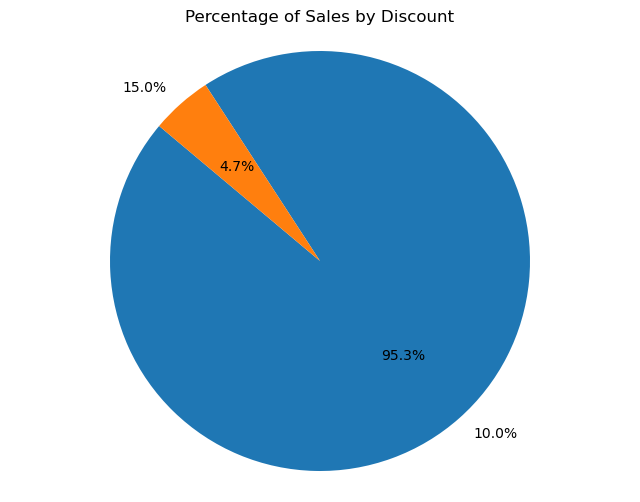

In [8]:
# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(discount_counts, labels=[f'{value:.1f}%' for value in discount_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sales by Discount')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### B. Calculate the average order value before and after the 15% discount.
*Only the prices affected by the discount are taken into consideration.*


In [11]:
dataframe_retail['TotalOrderValue_Discount'] = dataframe_retail['TotalOrderValue'] * (1 - dataframe_retail['Discount']/100)

In [15]:
avg_order_value_before_discount = dataframe_retail[dataframe_retail['Discount'] == 15]['TotalOrderValue'].mean()
avg_order_value_after_discount = dataframe_retail[dataframe_retail['Discount'] == 15]['TotalOrderValue_Discount'].mean()

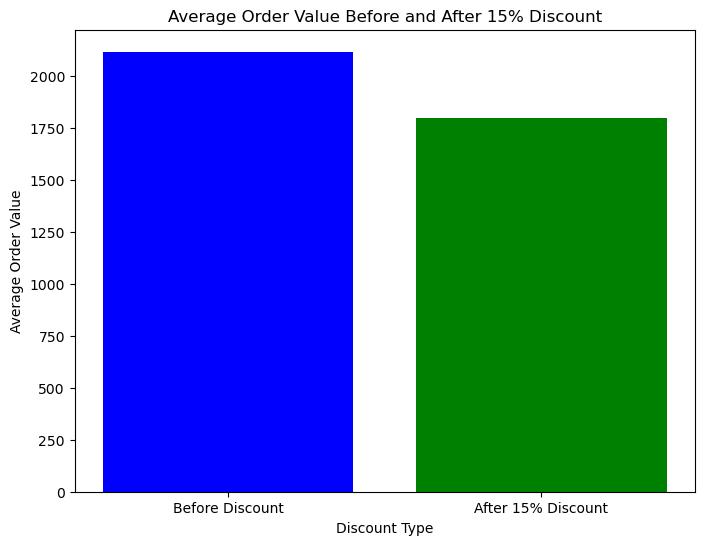

In [18]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Before Discount', 'After 15% Discount'], [avg_order_value_before_discount, avg_order_value_after_discount], color=['blue', 'green'])
plt.title('Average Order Value Before and After 15% Discount')
plt.xlabel('Discount Type')
plt.ylabel('Average Order Value')
plt.show()